# BACK PROPAGATION AND GRADIENT DESCENT ON A SINGLE NEURON

In [3]:
import numpy as np

# Inputs
x1, x2 = 0.6, 0.1
y = 1

# Parameters
w1, w2, b = 0.2, -0.3, 0.4
lr = 0.1

# Sigmoid
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Forward pass
z = w1*x1 + w2*x2 + b
y_pred = sigmoid(z)

# Loss derivative
dL_dy_pred = y_pred - y

# Sigmoid derivative
dy_pred_dz = y_pred*(1-y_pred)

# Chain rule
dL_dz = dL_dy_pred * dy_pred_dz

# Gradients
dL_dw1 = dL_dz * x1
dL_dw2 = dL_dz * x2
dL_db = dL_dz

# Update
w1 -= lr*dL_dw1
w2 -= lr*dL_dw2
b  -= lr*dL_db

print(w1, w2, b)


0.20536959297953516 -0.2991050678367441 0.4089493216325586


# Error vs Epochs for Different Learning Rates

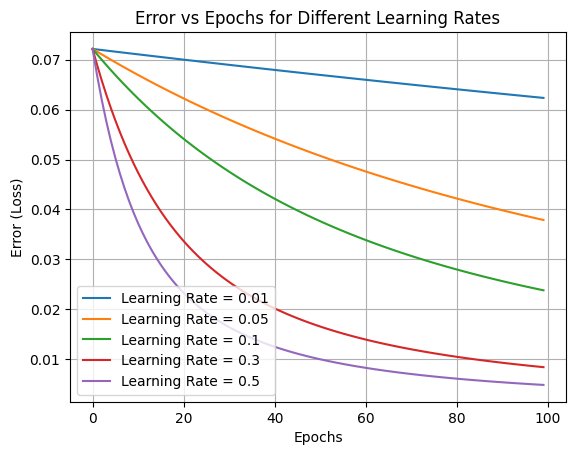

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Input and target
x1, x2 = 0.6, 0.1
y = 1

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Mean Squared Error loss
def loss(y_pred, y):
    return 0.5 * (y_pred - y) ** 2

# Learning rates to compare
learning_rates = [0.01,0.05,0.1, 0.3, 0.5]
epochs = 100

# Dictionary to store loss values
errors = {}

for lr in learning_rates:
    # Initialize parameters
    w1, w2, b = 0.2, -0.3, 0.4
    errors[lr] = []

    for _ in range(epochs):
        # Forward pass
        z = w1 * x1 + w2 * x2 + b
        y_pred = sigmoid(z)

        # Compute loss
        errors[lr].append(loss(y_pred, y))

        # Backpropagation
        dL_dy_pred = y_pred - y
        dy_pred_dz = y_pred * (1 - y_pred)
        dL_dz = dL_dy_pred * dy_pred_dz

        # Gradients
        dL_dw1 = dL_dz * x1
        dL_dw2 = dL_dz * x2
        dL_db = dL_dz

        # Update parameters
        w1 -= lr * dL_dw1
        w2 -= lr * dL_dw2
        b  -= lr * dL_db

# Plot the results
for lr in learning_rates:
    plt.plot(errors[lr], label=f"Learning Rate = {lr}")

plt.xlabel("Epochs")
plt.ylabel("Error (Loss)")
plt.title("Error vs Epochs for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()


# BACK PROPAGATION AND GRADIENT DESCENT ON "AND GATE"

In [4]:
import numpy as np

# AND data
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y = np.array([0,0,0,1])

# Parameters
w = np.array([0.1, 0.2])
b = 0.3
lr = 0.1

def sigmoid(z):
    return 1/(1+np.exp(-z))

# Training
for epoch in range(1000):
    for i in range(len(X)):
        z = np.dot(X[i], w) + b
        y_pred = sigmoid(z)

        # BCE + Sigmoid gradient shortcut
        dz = y_pred - y[i]
        dw = dz * X[i]
        db = dz
        w -= lr * dw
        b -= lr * db

print("Weights:", w)
print("Bias:", b)


Weights: [5.60154076 5.59544869]
Bias: -8.565987677634602


# AND Gate: Error vs Epochs for Different Learning Rates

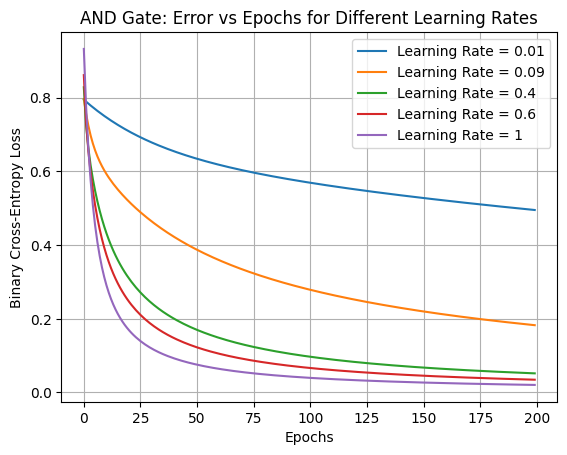

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# AND data
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
y = np.array([0,0,0,1])

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary Cross Entropy Loss
def bce_loss(y_true, y_pred):
    eps = 1e-9  # to avoid log(0)
    return -(y_true*np.log(y_pred + eps) +
             (1 - y_true)*np.log(1 - y_pred + eps))

# Learning rates to test
learning_rates = [0.01, 0.09, 0.4,0.6,1]
epochs = 200

errors = {}

for lr in learning_rates:
    # Initialize parameters
    w = np.array([0.1, 0.2], dtype=float)
    b = 0.3
    errors[lr] = []

    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(len(X)):
            # Forward pass
            z = np.dot(X[i], w) + b
            y_pred = sigmoid(z)

            # Loss
            epoch_loss += bce_loss(y[i], y_pred)

            # Gradients (BCE + Sigmoid shortcut)
            dz = y_pred - y[i]
            dw = dz * X[i]
            db = dz

            # Update
            w -= lr * dw
            b -= lr * db

        errors[lr].append(epoch_loss / len(X))

# Plot
for lr in learning_rates:
    plt.plot(errors[lr], label=f"Learning Rate = {lr}")

plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("AND Gate: Error vs Epochs for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()


# BACK PROPAGATION AND GRADIENT DESCENT ON "OR GATE"

In [5]:
import numpy as np

# AND data
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y = np.array([0,1,1,1])

# Parameters
w = np.array([0.1, 0.2])
b = 0.3
lr = 0.1

def sigmoid(z):
    return 1/(1+np.exp(-z))

# Training
for epoch in range(1000):
    for i in range(len(X)):
        z = np.dot(X[i], w) + b
        y_pred = sigmoid(z)

        # BCE + Sigmoid gradient shortcut
        dz = y_pred - y[i]
        dw = dz * X[i]
        db = dz
        w -= lr * dw
        b -= lr * db

print("Weights:", w)
print("Bias:", b)


Weights: [6.7832796  6.78742098]
Bias: -2.9139465005185365


# OR Gate: Error vs Epochs for Different Learning Rates

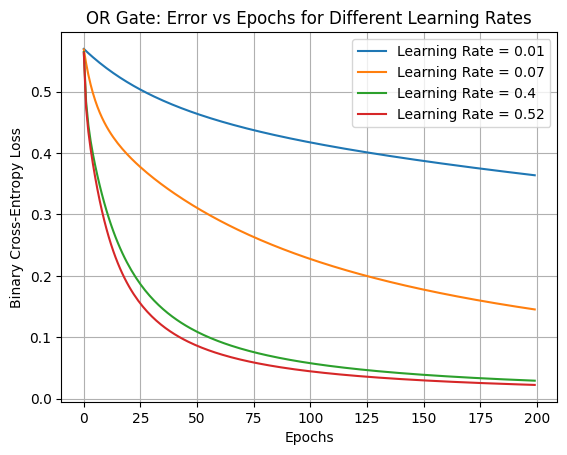

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# OR data
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
y = np.array([0,1,1,1])

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary Cross Entropy Loss
def bce_loss(y_true, y_pred):
    eps = 1e-9
    return -(y_true*np.log(y_pred + eps) +
             (1 - y_true)*np.log(1 - y_pred + eps))

# Learning rates to test
learning_rates = [0.01, 0.07, 0.4,0.52]
epochs = 200

errors = {}

for lr in learning_rates:
    # Initialize parameters
    w = np.array([0.1, 0.2], dtype=float)
    b = 0.3
    errors[lr] = []

    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(len(X)):
            # Forward pass
            z = np.dot(X[i], w) + b
            y_pred = sigmoid(z)

            # Loss
            epoch_loss += bce_loss(y[i], y_pred)

            # Gradients (BCE + Sigmoid shortcut)
            dz = y_pred - y[i]
            dw = dz * X[i]
            db = dz

            # Update
            w -= lr * dw
            b -= lr * db

        errors[lr].append(epoch_loss / len(X))

# Plot
for lr in learning_rates:
    plt.plot(errors[lr], label=f"Learning Rate = {lr}")

plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("OR Gate: Error vs Epochs for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()
